<a href="https://colab.research.google.com/github/Ahmed2045/Autoencoder-for-MNIST-Dataset/blob/main/MNIST_AUTOENCODER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# modified model
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.UpSampling2D((2, 2))(encoded)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
# encoder
encoder = keras.Model(input_img, encoded)

In [ ]:
# decoder
decoder_input = keras.Input(shape=(7, 7, 16))
x = layers.UpSampling2D((2, 2))(decoder_input)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoder_layer = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(decoder_input, decoder_layer)

In [ ]:
# autoencoder
input = keras.Input(shape=(28, 28, 1))
encoded_m = encoder(input)
decoded_m = decoder(encoded_m)
autoencoder = keras.Model(input, decoded_m)

In [ ]:
# autoencoder compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 7, 7, 16)          4944      
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         2465      
                                                                 
Total params: 7,409
Trainable params: 7,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

for a in (autoencoder.weights):
  print(a.shape )

decoded_imgs = autoencoder.predict(x_test)

Epoch 1/5
469/469 [==============================] - 36s 13ms/step - loss: 0.1434 - val_loss: 0.0800
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0781 - val_loss: 0.0755
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0753 - val_loss: 0.0737
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0737 - val_loss: 0.0724
Epoch 5/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0726 - val_loss: 0.0715
(3, 3, 1, 32)
(32,)
(3, 3, 32, 16)
(16,)
(3, 3, 16, 16)
(16,)
(3, 3, 16, 1)
(1,)


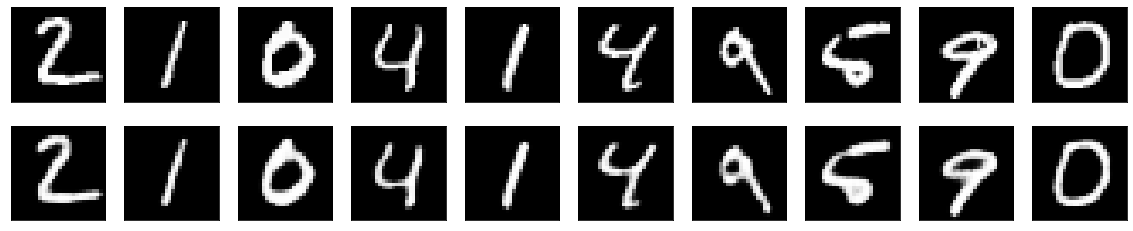

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
k = 10

test_list = list(x_test)
test_samples = random.sample(test_list, k)
test_samples = np.array(test_samples)

encoded_output = encoder.predict(test_samples)
decoded_output = decoder.predict(encoded_output)
print(encoded_output.shape)
print(decoded_output.shape)

(10, 7, 7, 16)
(10, 28, 28, 1)


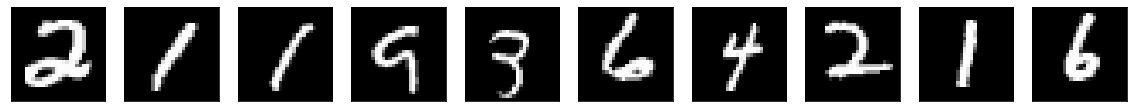

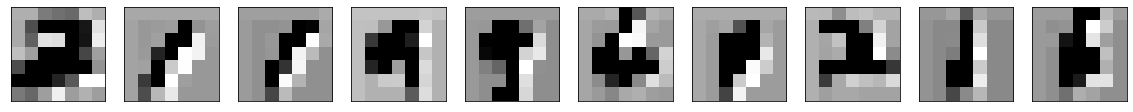

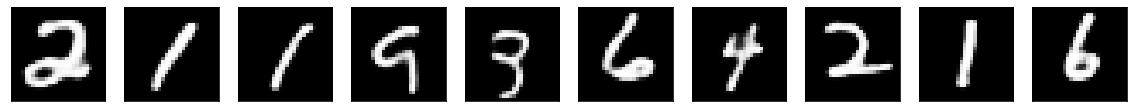

In [ ]:
plt.figure(figsize=(20, 8))
for i in range(0, k):
    # Display original
    ax = plt.subplot(2, k, i+1)
    plt.imshow(test_samples[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 8))
for i in range(0, k):
    ax = plt.subplot(1, k, i+1)
    plt.imshow(encoded_output[i,:,:,4].reshape((7, 7)))
    #plt.imshow(encoded_imgs[i].reshape((14 * 14 , 16)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 8))
for i in range(0, k):
    # Display reconstruction from decoder model
    ax = plt.subplot(1, k, i+1)
    plt.imshow(decoded_output[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
